In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [120]:
df = pd.read_csv("D:\School\Fall 22\STATS 402\weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217138,2022-08-26,Uluru,3.8,21.2,0.0,NaN,NaN,E,35.0,E,...,16.0,1024.2,1019.4,NaN,NaN,11.2,20.1,No,0.0,No
217139,2022-08-27,Uluru,3.2,24.6,0.0,NaN,NaN,ENE,28.0,ESE,...,10.0,1019.9,1014.3,NaN,NaN,12.2,23.4,No,0.0,No
217140,2022-08-28,Uluru,3.6,28.8,0.0,NaN,NaN,NW,48.0,ENE,...,8.0,1015.2,1011.4,NaN,NaN,15.1,28.1,No,0.0,No
217141,2022-08-29,Uluru,9.3,24.9,0.0,NaN,NaN,SE,31.0,S,...,24.0,1019.8,1017.9,NaN,NaN,15.5,23.8,No,0.0,No


In [121]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [122]:
print("The number of No labels is: ", len(df[df.RainTomorrow.eq('No')]))
print("That constitutes: ", round(100*len(df[df.RainTomorrow.eq('No')])/len(df), 2), ' % of the dataset')

The number of No labels is:  164187
That constitutes:  75.61  % of the dataset


In [123]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,213597.0,12.013287,6.437902,-8.7,7.4,11.8,16.7,33.9
MaxTemp,213784.0,23.132537,7.139490,-4.1,17.9,22.5,28.1,48.9
Rainfall,210781.0,2.333787,8.547405,0.0,0.0,0.0,0.6,474.0
Evaporation,101279.0,5.489808,4.226591,0.0,2.6,4.8,7.4,138.7
Sunshine,92165.0,7.617073,3.771815,0.0,4.8,8.5,10.6,14.5
WindGustSpeed,200920.0,40.029041,13.577398,2.0,31.0,39.0,48.0,135.0
WindSpeed9am,212983.0,14.035618,8.886909,0.0,7.0,13.0,19.0,87.0
WindSpeed3pm,209412.0,18.581447,8.738994,0.0,13.0,17.0,24.0,87.0
Humidity9am,212294.0,68.979076,19.516599,0.0,57.0,70.0,84.0,100.0
Humidity3pm,208212.0,51.399818,21.083946,0.0,36.0,52.0,66.0,100.0


In [124]:
missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing


Sunshine         0.575556
Evaporation      0.533584
Cloud3pm         0.458131
Cloud9am         0.431375
Pressure9am      0.110637
Pressure3pm      0.110549
WindDir9am       0.078474
WindGustDir      0.075204
WindGustSpeed    0.074711
WindDir3pm       0.042543
Humidity3pm      0.041130
Temp3pm          0.035843
WindSpeed3pm     0.035603
RainToday        0.029299
Rainfall         0.029299
RISK_MM          0.029294
RainTomorrow     0.029294
Humidity9am      0.022331
WindSpeed9am     0.019158
Temp9am          0.016689
MinTemp          0.016330
MaxTemp          0.015469
Location         0.000000
Date             0.000000
dtype: float64

In [125]:
# dropping columns that have NA > 20%
df = df.drop(columns=['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am'])

In [126]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [127]:
# fill categorical columns with mode
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].fillna(df[column].value_counts().idxmax())

In [128]:
# fill numerical columns with mean
for column in df.select_dtypes(include=['float64']).columns:
    df[column] = df[column].fillna(df[column].mean())

In [129]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [130]:
# df.loc[df.RainToday=='Yes', 'RainToday']=1
# df.loc[df.RainToday=='No', 'RainToday']=0
# df.loc[df.RainTomorrow=='Yes', 'RainTomorrow']=1
# df.loc[df.RainTomorrow=='No', 'RainTomorrow']=0

In [131]:
# df['RainToday'] = df['RainToday'].astype(int)
# df['RainTomorrow'] = df['RainTomorrow'].astype(int)

In [132]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

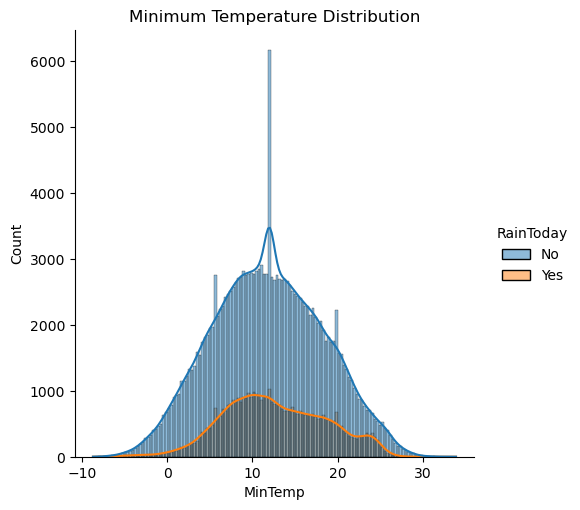

In [133]:
sns.displot(df, x='MinTemp', hue='RainToday', kde=True)
plt.title("Minimum Temperature Distribution")
plt.show()

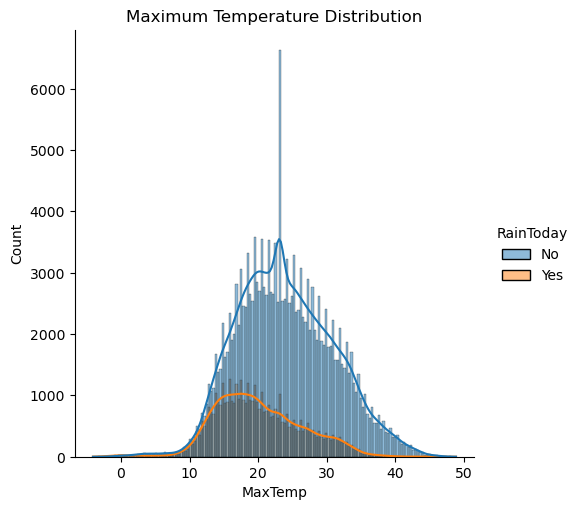

In [134]:
sns.displot(df, x='MaxTemp', hue='RainToday', kde=True)
plt.title("Maximum Temperature Distribution")
plt.show()

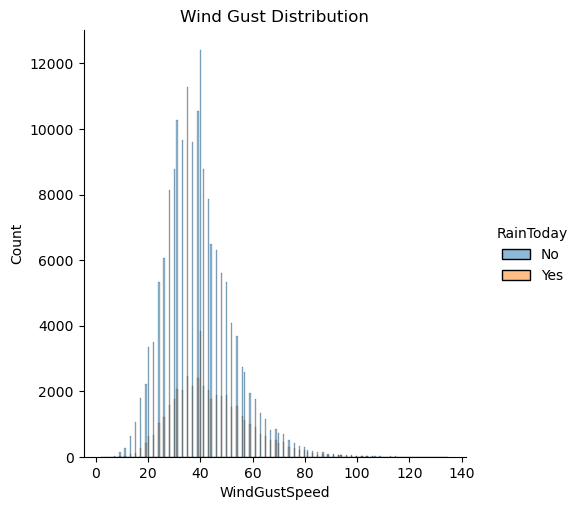

In [135]:
sns.displot(df, x='WindGustSpeed', hue='RainToday', )
plt.title("Wind Gust Distribution")
plt.show()

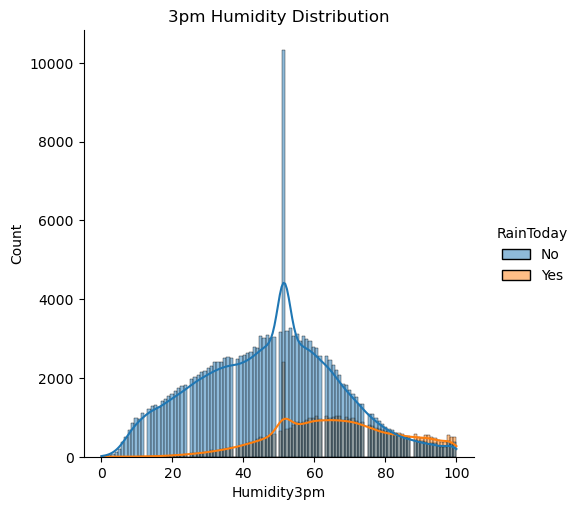

In [136]:
sns.displot(df, x='Humidity3pm', hue='RainToday', kde=True)
plt.title("3pm Humidity Distribution")
plt.show()

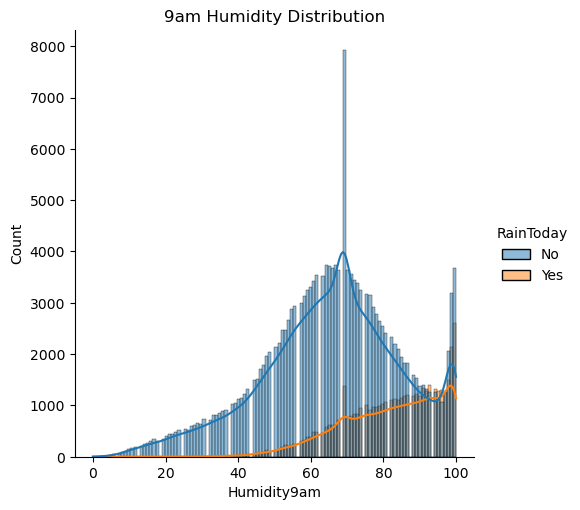

In [137]:
sns.displot(df, x='Humidity9am', hue='RainToday', kde=True)
plt.title("9am Humidity Distribution")
plt.show()

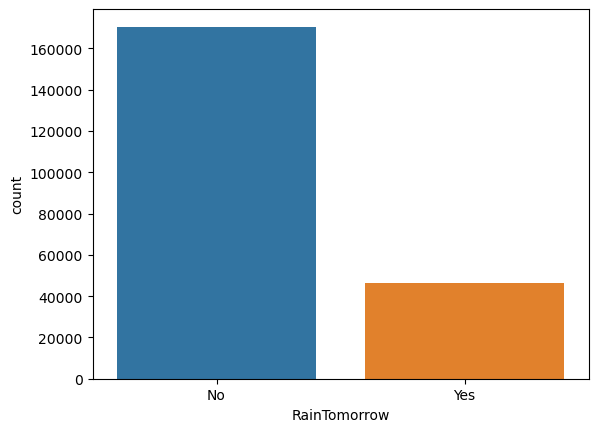

In [138]:
sns.countplot(x=df['RainTomorrow'])
plt.show()

In [139]:
# df_majority_0 = df[(df['RainTomorrow']=="No")] 
# df_minority_1 = df[(df['RainTomorrow']=="Yes")] 
# df_minority_upsampled = resample(df_minority_1, 
#                                  replace=True,    
#                                  n_samples=len(df[(df['RainTomorrow']=="No")]),
#                                  random_state=402) 

# df_upsampled = pd.concat([df_minority_upsampled, df_majority_0])

In [140]:
# sns.countplot(x=df_upsampled['RainTomorrow'])
# plt.show()

In [141]:
# new_df=df_upsampled.sort_values(by=['Location', 'Date'])
# new_df

In [143]:
df.index = df.Date
df = df.drop(columns=['Date'])
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,0.0,No
2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,0.0,No
2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,0.0,No
2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,1.0,No
2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-26,Uluru,3.8,21.2,0.0,E,35.0,E,E,17.0,15.0,35.0,16.0,1024.2,1019.4,11.2,20.1,No,0.0,No
2022-08-27,Uluru,3.2,24.6,0.0,ENE,28.0,ESE,N,13.0,15.0,31.0,10.0,1019.9,1014.3,12.2,23.4,No,0.0,No
2022-08-28,Uluru,3.6,28.8,0.0,NW,48.0,ENE,WNW,7.0,20.0,24.0,8.0,1015.2,1011.4,15.1,28.1,No,0.0,No


In [151]:
objects = df.drop(columns=['Location']).select_dtypes(include = "object").columns
for i in range(len(objects)):
    df[objects[i]] = LabelEncoder().fit_transform(df[objects[i]])

In [152]:
plt.figure(figsize=(17,18))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,fmt='.2f')

<AxesSubplot:>

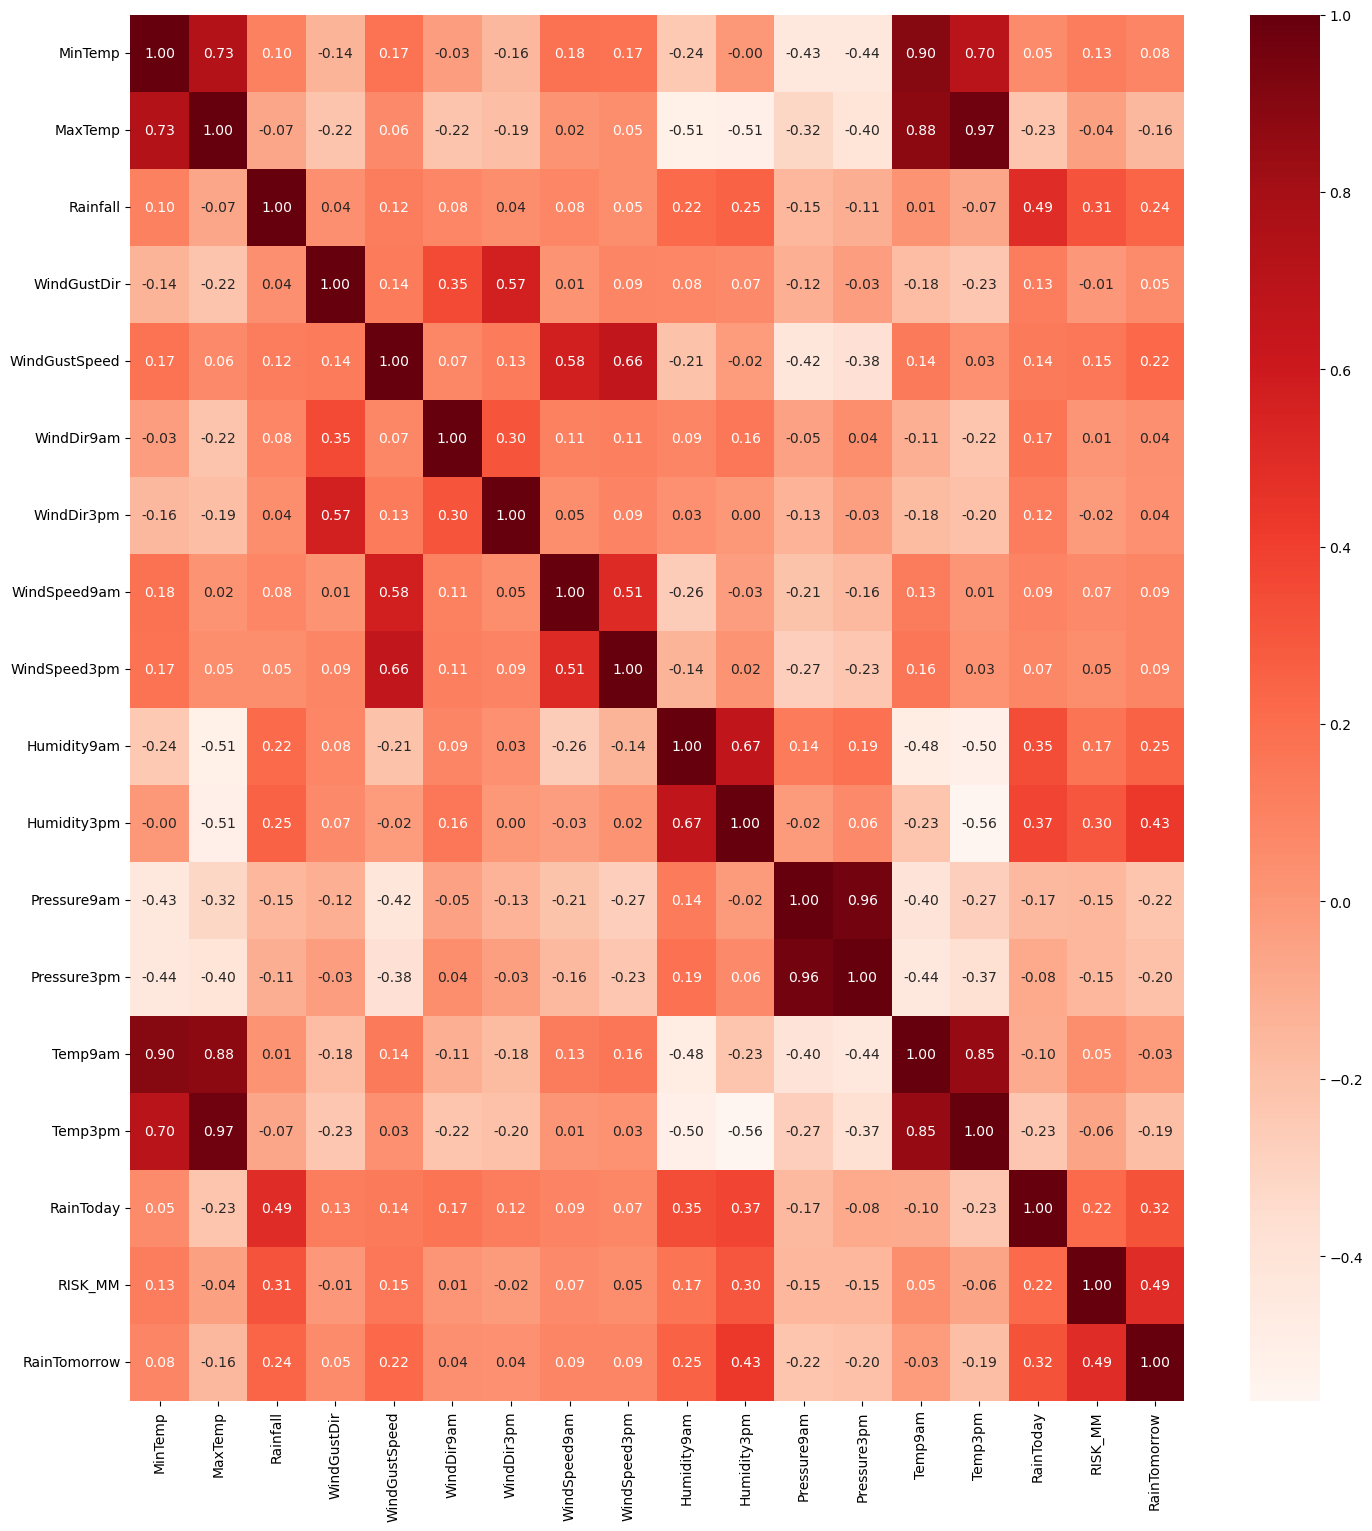

In [153]:
plt.show()

In [154]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RISK_MM          float64
RainTomorrow       int32
dtype: object

In [155]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [159]:
def create_train_set(df):
    X = df.drop(columns=['RainTomorrow', 'Location'])
    y = df['RainTomorrow']
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=False)
    return X_train, X_test, y_train, y_test 

In [160]:
X_train_al, X_test_al, y_train_al, y_test_al = create_train_set(df[df['Location']=="Albury"])

In [162]:
X_train_al.head(20)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM
Date,,,,,,,,,,,,,,,,,
2008-12-01,13.4,22.9,0.600000,13,44.000000,13,14,20.000000,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0.00000
2008-12-02,7.4,25.1,0.000000,14,44.000000,6,15,4.000000,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0.00000
2008-12-03,12.9,25.7,0.000000,15,46.000000,13,15,19.000000,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0.00000
2008-12-04,9.2,28.0,0.000000,4,24.000000,9,0,11.000000,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,1.00000
2008-12-05,17.5,32.3,1.000000,13,41.000000,1,7,7.000000,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0.20000
2008-12-06,14.6,29.7,0.200000,14,56.000000,13,13,19.000000,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,0,0.00000
2008-12-07,14.3,25.0,0.000000,13,50.000000,12,13,20.000000,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,0,0.00000
2008-12-08,7.7,26.7,0.000000,13,35.000000,10,13,6.000000,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,0,0.00000
2008-12-09,9.7,31.9,0.000000,6,80.000000,9,7,7.000000,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,0,1.40000


In [163]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

In [173]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini', max_depth=3, n_estimators=20, random_state=402)
RandomForestClassifierModel.fit(X_train_al, y_train_al)

print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train_al, y_train_al))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test_al, y_test_al))

RandomForestClassifierModel Train Score is :  0.9791615592056877
RandomForestClassifierModel Test Score is :  0.9691629955947136


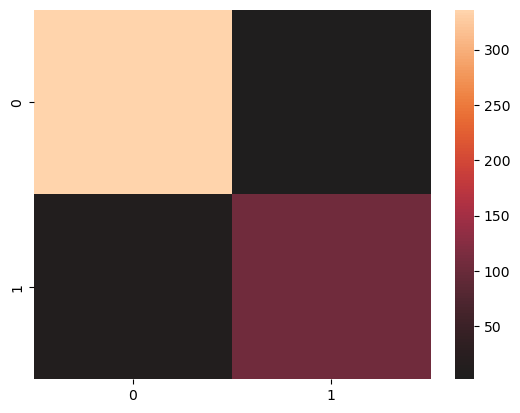

Confusion Matrix is
 [[336   2]
 [ 12 104]]


In [174]:
y_pred_RF = RandomForestClassifierModel.predict(X_test_al)
CM_RF = confusion_matrix(y_test_al, y_pred_RF)

sns.heatmap(CM_RF, center=True)
plt.show()

print('Confusion Matrix is\n', CM_RF)

In [183]:
GBCModel = GradientBoostingClassifier(n_estimators=5, max_depth=1, learning_rate=0.1, random_state=402)
GBCModel.fit(X_train_al, y_train_al)
print('GBCModel Train Score is : ' , GBCModel.score(X_train_al, y_train_al))
print('GBCModel Test Score is : ' , GBCModel.score(X_test_al, y_test_al))

GBCModel Train Score is :  0.991909781809267
GBCModel Test Score is :  0.9933920704845814


In [185]:
len(X_train_al)

4079

In [186]:
step = 1

past = 3000
future = 500
learning_rate = 0.001
batch_size = 256
epochs = 10


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std


In [187]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    X_train_al,
    y_train_al,
    sequence_length=step,
    sampling_rate=1,
    batch_size=batch_size,
)



In [188]:
for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)


Input shape: (256, 1, 17)
Target shape: (256,)


In [206]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(64)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss="mse")
model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1, 17)]           0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                20992     
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 21,057
Trainable params: 21,057
Non-trainable params: 0
_________________________________________________________________


In [207]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=100,
    #validation_data=,
    callbacks=[es_callback, modelckpt_callback],
)


Epoch 1/100
15/16 [===========================>..] - ETA: 0s - loss: 0.2235
Epoch 1: loss improved from inf to 0.21981, saving model to model_checkpoint.h5
16/16 [==============================] - 3s 20ms/step - loss: 0.2198
Epoch 2/100
14/16 [=========================>....] - ETA: 0s - loss: 0.1672
Epoch 2: loss improved from 0.21981 to 0.16672, saving model to model_checkpoint.h5
16/16 [==============================] - 0s 21ms/step - loss: 0.1667
Epoch 3/100
13/16 [=======================>......] - ETA: 0s - loss: 0.1611
Epoch 3: loss improved from 0.16672 to 0.16015, saving model to model_checkpoint.h5
16/16 [==============================] - 0s 20ms/step - loss: 0.1602
Epoch 4/100
12/16 [=====================>........] - ETA: 0s - loss: 0.1609
Epoch 4: loss improved from 0.16015 to 0.15781, saving model to model_checkpoint.h5
16/16 [==============================] - 0s 21ms/step - loss: 0.1578
Epoch 5/100
13/16 [=======================>......] - ETA: 0s - loss: 0.1592
Epoch 5: los

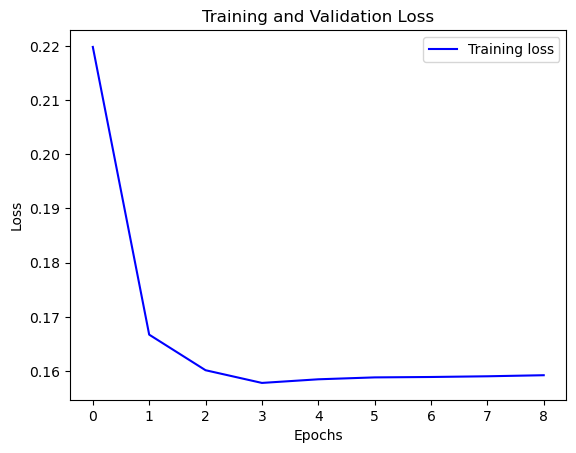

In [209]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")


In [217]:
albury = df[df['Location']=='Albury'].drop(columns='Location')

In [218]:
albury

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,
2008-12-01,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0.0,0
2008-12-02,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0.0,0
2008-12-03,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0.0,0
2008-12-04,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,1.0,0
2008-12-05,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-26,3.3,17.4,0.0,0,17.0,0,2,4.0,9.0,88.0,52.0,1029.5,1026.9,10.4,16.3,0,0.0,0
2022-08-27,3.3,19.5,0.0,4,17.0,3,4,0.0,9.0,88.0,52.0,1030.3,1026.0,10.1,17.5,0,1.6,1
2022-08-28,5.8,19.7,1.6,5,33.0,3,4,0.0,22.0,92.0,64.0,1027.9,1024.1,11.4,18.7,1,0.0,0


In [238]:
split_fraction = 0.75
train_split = int(split_fraction * int(albury.shape[0]))
step = 1

past = 100
future = 10
learning_rate = 0.001
batch_size = 256
epochs = 10


def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

features = normalize(albury.values, train_split)
features = pd.DataFrame(features)
features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.653728,0.032773,-0.201210,0.862399,0.813964,1.495998,1.153885,1.728218,1.361743,-0.145166,-1.278218,-1.498210,-1.257576,0.404554,0.059627,-0.496412,-0.301114,-0.496872
1,-0.308982,0.312154,-0.301084,1.075568,0.813964,-0.101591,1.371305,-0.620021,1.082190,-1.677422,-1.126393,-1.099898,-1.158405,0.450540,0.388559,-0.496412,-0.301114,-0.496872
2,0.573502,0.388349,-0.301084,1.288738,0.962890,1.495998,1.371305,1.581453,1.641297,-2.017923,-0.873351,-1.511945,-1.030900,1.033017,0.243829,-0.496412,-0.301114,-0.496872
3,-0.020169,0.680430,-0.301084,-1.056126,-0.675299,0.583090,-1.890006,0.407334,-0.734906,-1.620671,-1.581869,-0.138456,-0.450044,0.588495,0.678019,-0.496412,-0.134658,-0.496872
4,1.311580,1.226494,-0.134628,0.862399,0.590574,-1.242726,-0.368061,-0.179726,0.802637,0.479086,-0.721525,-1.072428,-1.413416,0.542510,1.099051,-0.496412,-0.267823,-0.496872


In [239]:
train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

start = past + future
end = start + train_split

x_train = train_data.values
y_train = features.iloc[start:end][[1]]

sequence_length = int(past / step)


In [240]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end].values
y_val = features.iloc[label_start:][[1]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)


Input shape: (256, 100, 18)
Target shape: (256, 1)


In [241]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(32)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()


Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 100, 18)]         0         
                                                                 
 lstm_9 (LSTM)               (None, 32)                6528      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


In [242]:
path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)


Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 0.4480
Epoch 1: val_loss improved from inf to 0.30685, saving model to model_checkpoint.h5
13/13 [==============================] - 17s 396ms/step - loss: 0.4480 - val_loss: 0.3069
Epoch 2/10
13/13 [==============================] - ETA: 0s - loss: 0.2795
Epoch 2: val_loss did not improve from 0.30685
13/13 [==============================] - 2s 136ms/step - loss: 0.2795 - val_loss: 0.3274
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 0.2559
Epoch 3: val_loss improved from 0.30685 to 0.28238, saving model to model_checkpoint.h5
13/13 [==============================] - 2s 120ms/step - loss: 0.2559 - val_loss: 0.2824
Epoch 4/10
13/13 [==============================] - ETA: 0s - loss: 0.2453
Epoch 4: val_loss improved from 0.28238 to 0.27782, saving model to model_checkpoint.h5
13/13 [==============================] - 2s 126ms/step - loss: 0.2453 - val_loss: 0.2778
Epoch 5/10
13/13 [==================

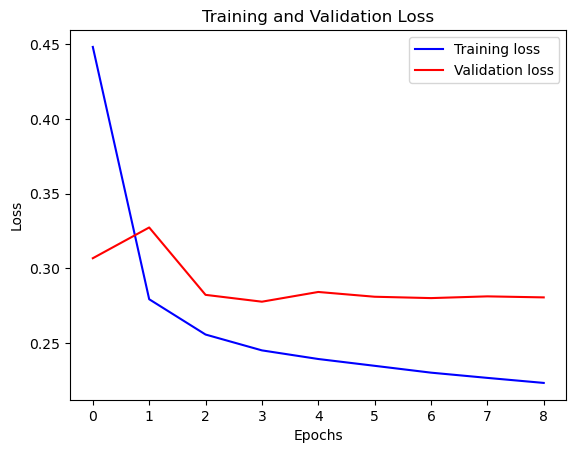

In [243]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")


8/8 [==============================] - 2s 24ms/step


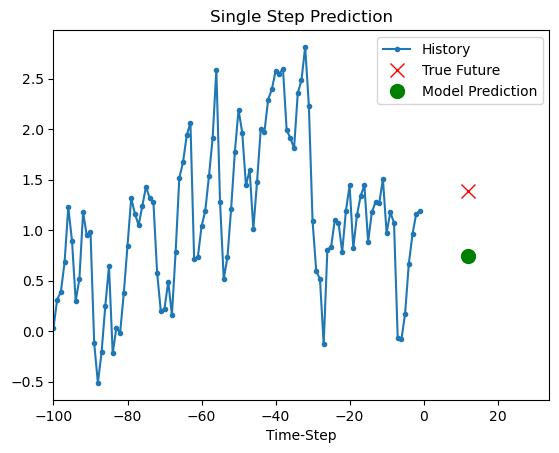

8/8 [==============================] - 0s 21ms/step


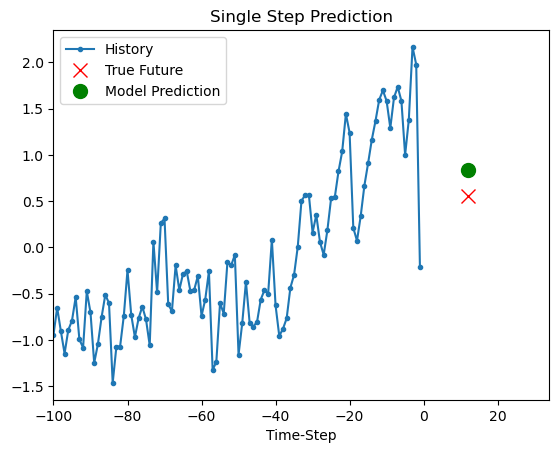

8/8 [==============================] - 0s 26ms/step


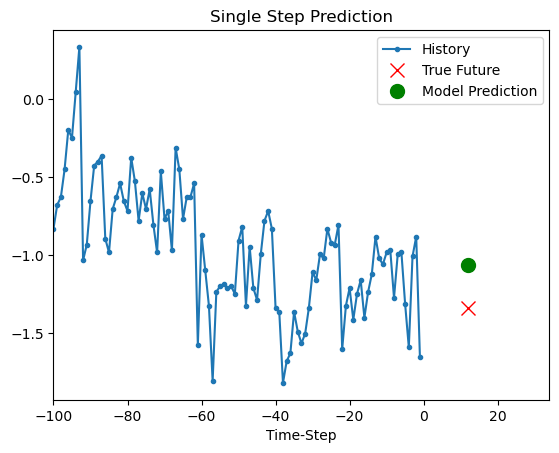

8/8 [==============================] - 0s 24ms/step


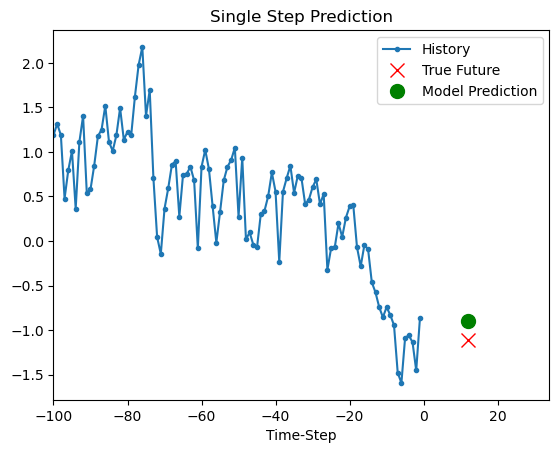

8/8 [==============================] - 0s 22ms/step


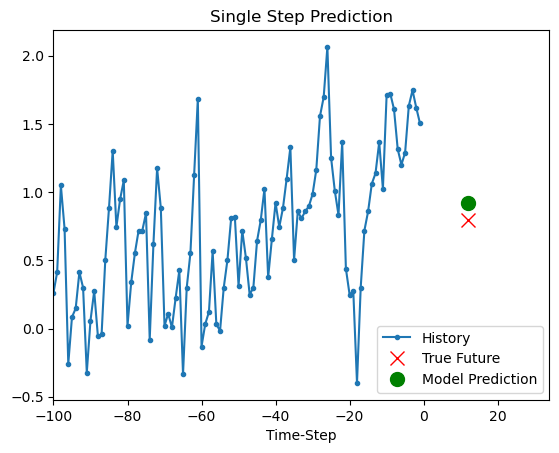

In [244]:
def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_train.take(5):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        12,
        "Single Step Prediction",
    )
